# Refer to SF EDA notebook for Price EDA (Section 5 & 10)

# Import Libraries

In [1]:
# pip install -r "../requirements.txt"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import Data

In [3]:
SF_df = pd.read_pickle("remove_features_without_encoding.pkl")
SF_df.tail(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,...,game console,stair gates,fireplace guards,pool,pocket wifi,changing table,beach essentials,window guards,ev charger,beachfront
5288,within an hour,1.0,0.99,1,1,Visitacion Valley,Entire townhouse,Entire home/apt,5,1.0,...,0,0,0,0,0,0,0,0,0,0
5289,within an hour,1.0,1.00,1,1,Visitacion Valley,Entire guesthouse,Entire home/apt,2,1.0,...,0,0,0,0,0,0,0,0,0,0
5290,-,0.0,1.00,0,3,Visitacion Valley,Entire guesthouse,Entire home/apt,2,1.0,...,0,0,0,0,0,0,0,0,0,0
5291,-,0.0,1.00,0,0,Visitacion Valley,Entire guest suite,Entire home/apt,2,1.0,...,0,0,0,0,0,0,0,1,0,0
5292,within an hour,1.0,1.00,0,0,Visitacion Valley,Private room in apartment,Private room,4,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   host_response_time          5293 non-null   object 
 1   host_response_rate          5293 non-null   float64
 2   host_acceptance_rate        5293 non-null   float64
 3   host_is_superhost           5293 non-null   int32  
 4   host_listings_count         5293 non-null   int64  
 5   neighbourhood_cleansed      5293 non-null   object 
 6   property_type               5293 non-null   object 
 7   room_type                   5293 non-null   object 
 8   accommodates                5293 non-null   int64  
 9   bathrooms                   5293 non-null   float64
 10  amenities                   5293 non-null   object 
 11  price                       5293 non-null   float64
 12  minimum_nights              5293 non-null   int64  
 13  review_scores_rating        5293 

# Different column type name lists

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = SF_df.select_dtypes(include=numerics).columns.to_list()
bool_columns = SF_df.select_dtypes(include='bool').columns.to_list()
object_columns = SF_df.select_dtypes(include='object').columns.to_list()
print(f"No. of numeric cols: {len(numeric_columns)}")
print(f"No. of boolean cols: {len(bool_columns)}")
print(f"No. of object cols: {len(object_columns)}")
print(f"Total: {len(numeric_columns)+len(bool_columns)+len(object_columns)}")
print("Object Columns :",object_columns)

No. of numeric cols: 75
No. of boolean cols: 0
No. of object cols: 5
Total: 80
Object Columns : ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


In [6]:
SF_df.isnull().sum()

host_response_time      0
host_response_rate      0
host_acceptance_rate    0
host_is_superhost       0
host_listings_count     0
                       ..
changing table          0
beach essentials        0
window guards           0
ev charger              0
beachfront              0
Length: 80, dtype: int64

## Transforming categorical columns to numeric columns and combine all into new df

In [7]:
new_SF_df = SF_df[numeric_columns]
new_SF_df.shape

(5293, 75)

In [8]:
for categorical_col in object_columns[:-1]:
    new_SF_df = pd.concat([new_SF_df, pd.get_dummies(SF_df[categorical_col])], axis=1)

In [9]:
new_SF_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,price,minimum_nights,review_scores_rating,reviews_per_month,...,Shared room in hostel,Shared room in house,Shared room in loft,Shared room in townhouse,Shared room in villa,Tiny house,Entire home/apt,Hotel room,Private room,Shared room
0,1.00,0.99,1,1,3,1.0,132.0,2,97.0,1.91,...,0,0,0,0,0,0,1,0,0,0
1,0.97,0.79,1,38,5,2.0,166.0,30,91.0,0.15,...,0,0,0,0,0,0,1,0,0,0
2,0.50,0.76,1,3,2,1.0,130.0,2,97.0,3.92,...,0,0,0,0,0,0,0,0,1,0
3,0.50,0.76,1,3,2,1.0,110.0,2,98.0,3.73,...,0,0,0,0,0,0,0,0,1,0
4,1.00,1.00,0,2,10,2.0,480.0,3,91.0,0.32,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,1.00,0.99,1,1,5,1.0,121.0,2,100.0,0.13,...,0,0,0,0,0,0,1,0,0,0
5289,1.00,1.00,1,1,2,1.0,151.0,2,99.0,4.11,...,0,0,0,0,0,0,1,0,0,0
5290,0.00,1.00,0,3,2,1.0,179.0,2,100.0,0.47,...,0,0,0,0,0,0,1,0,0,0
5291,0.00,1.00,0,0,2,1.0,190.0,30,100.0,0.48,...,0,0,0,0,0,0,1,0,0,0


In [10]:
new_SF_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
new_SF_df.columns.values[166] = "Private room (Room Type)"
new_SF_df.columns.values[166]

'Private room (Room Type)'

In [12]:
new_SF_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [13]:
print(new_SF_df.duplicated().any())
if new_SF_df.duplicated().any():
    duplicate_rows = new_SF_df[new_SF_df.duplicated()]
    print(duplicate_rows)
    new_SF_df = new_SF_df.drop_duplicates()
    print("Duplicates Removed")
print(new_SF_df.duplicated().any())

False
False


In [14]:
new_SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 168 entries, host_response_rate to Shared room
dtypes: float64(9), int32(1), int64(65), uint8(93)
memory usage: 3.5 MB


In [16]:
new_SF_df.columns.to_list()

['host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'price',
 'minimum_nights',
 'review_scores_rating',
 'reviews_per_month',
 'price_log',
 'sentiment_compound',
 'SafeIndex_Score',
 'wifi',
 'heating',
 'smoke alarm',
 'essentials',
 'hair dryer',
 'tv',
 'kitchen',
 'hot water',
 'fire extinguisher',
 'washer',
 'coffee maker',
 'refrigerator',
 'free street parking',
 'first aid kit',
 'bed linens',
 'oven',
 'private entrance',
 'dishwasher',
 'cable tv',
 'luggage dropoff allowed',
 'long term stays allowed',
 'garden or backyard',
 'patio or balcony',
 'lock on bedroom door',
 'lockbox',
 'keypad',
 'free parking on premises',
 'elevator',
 'bathtub',
 'indoor fireplace',
 'paid parking off premises',
 'air conditioning',
 "pack 'n play/travel crib",
 'bbq grill',
 'breakfast',
 'host greets you',
 'room-darkening shades',
 "children's books and toys",
 'shower gel',
 'single level home',
 'paid parking o

In [17]:
# new_SF_df.to_pickle('FINAL_price_df.pkl',protocol=3)

price_df = pd.read_pickle('FINAL_price_df.pkl')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 0 to 6808
Columns: 171 entries, host_response_rate to Shared room
dtypes: float64(8), int32(1), int64(66), uint8(96)
memory usage: 4.5 MB


# Train/Test split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y = new_SF_df['price'] # target/dependent variable
x = new_SF_df.drop(['price','price_log'], axis =1) # independent variables

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

# Random Forest

## Train/Test w Random Forest Algorithm

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 69.053
R^2 test: 0.628


## Feature Importance of Random Forest Algorithm

In [20]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,0.294624
6,minimum_nights,0.076852
8,reviews_per_month,0.073196
5,bathrooms,0.072629
9,sentiment_compound,0.043837
3,host_listings_count,0.041225
162,Entire home/apt,0.034661
10,SafeIndex_Score,0.028427
1,host_acceptance_rate,0.021577
7,review_scores_rating,0.020843


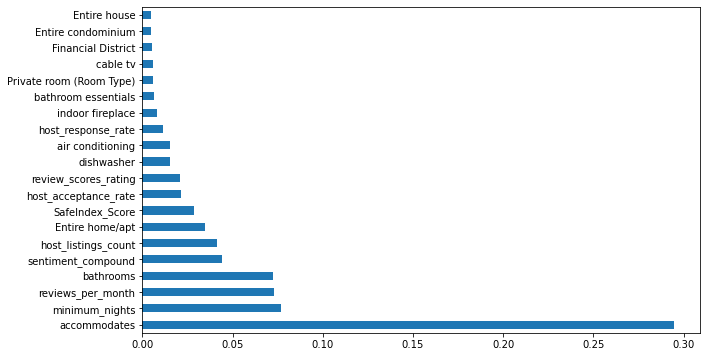

In [21]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# LightGBM

## Train/Test w LightGBM

In [22]:
from lightgbm import LGBMRegressor

fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds
[100]	valid's rmse: 81.1003
[200]	valid's rmse: 72.2863
[300]	valid's rmse: 69.3055
[400]	valid's rmse: 67.991
[500]	valid's rmse: 67.5061
[600]	valid's rmse: 67.1782
Early stopping, best iteration is:
[665]	valid's rmse: 67.0772
R^2 test: 0.649


## Feature Importance of LightGBM

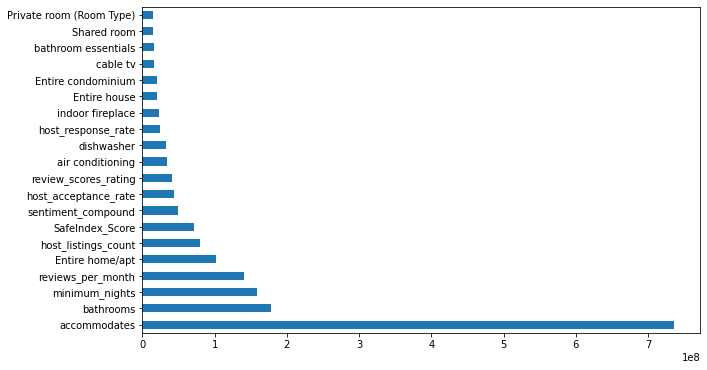

In [23]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

In [24]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = x.columns
coefs_df['coefs'] = clf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,7.357810e+08
5,bathrooms,1.774936e+08
6,minimum_nights,1.589113e+08
8,reviews_per_month,1.404127e+08
162,Entire home/apt,1.015891e+08
3,host_listings_count,7.900208e+07
10,SafeIndex_Score,7.205365e+07
9,sentiment_compound,4.911563e+07
1,host_acceptance_rate,4.412952e+07
7,review_scores_rating,4.124615e+07


# Gradient Boosting

## Train/Test w Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor


gboost = GradientBoostingRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3)
gboost.fit(X_train, y_train)
y_train_pred = gboost.predict(X_train)
y_test_pred = gboost.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 68.970
R^2 test: 0.629


## Feature Importance of Gradient Boosting

In [26]:
coefs_df = pd.DataFrame()
coefs_df['feature'] = X_train.columns
coefs_df['coefs'] = gboost.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,feature,coefs
4,accommodates,0.354299
6,minimum_nights,0.096449
5,bathrooms,0.081049
8,reviews_per_month,0.053791
162,Entire home/apt,0.053333
3,host_listings_count,0.033459
9,sentiment_compound,0.026378
10,SafeIndex_Score,0.025097
7,review_scores_rating,0.019027
1,host_acceptance_rate,0.017554


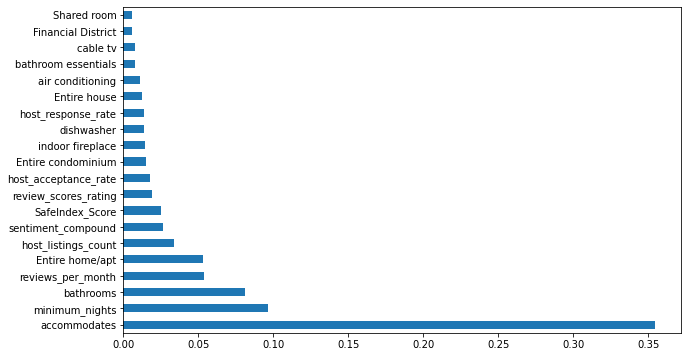

In [27]:
feat_imp = pd.Series(gboost.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))

# XGBoost and its Feature Importance


Training MSE: 557.8033
Validation MSE: 4948.0697
Validation RMSE: 70.3425

Training r2: 0.9566
Validation r2: 0.6142


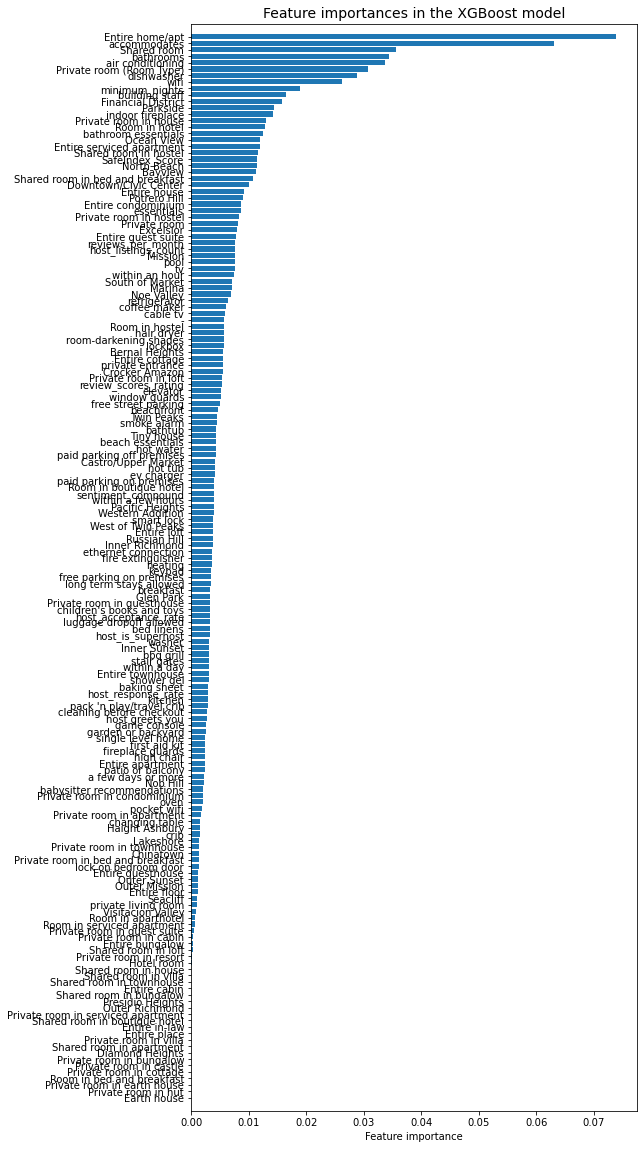

In [28]:
import xgboost as xgb

# Fitting the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

# Printing the results

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_xgb_reg)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# Neural Network Model

In [29]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(512, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               21376     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 252,289
Trainable params: 252,289
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
14/14 [==============================] - 0s 26ms/step - loss: 25780.2051 - mean_squared_error: 2578

14/14 [==============================] - 0s 11ms/step - loss: 4163.1152 - mean_squared_error: 4163.1152 - val_loss: 4738.1528 - val_mean_squared_error: 4738.1528
Epoch 43/100
14/14 [==============================] - 0s 10ms/step - loss: 4010.2888 - mean_squared_error: 4010.2888 - val_loss: 4677.4673 - val_mean_squared_error: 4677.4673
Epoch 44/100
14/14 [==============================] - 0s 10ms/step - loss: 4074.6716 - mean_squared_error: 4074.6716 - val_loss: 4961.9326 - val_mean_squared_error: 4961.9326
Epoch 45/100
14/14 [==============================] - 0s 10ms/step - loss: 3983.7493 - mean_squared_error: 3983.7493 - val_loss: 4698.9355 - val_mean_squared_error: 4698.9355
Epoch 46/100
14/14 [==============================] - 0s 8ms/step - loss: 3963.3193 - mean_squared_error: 3963.3193 - val_loss: 4704.8257 - val_mean_squared_error: 4704.8257
Epoch 47/100
14/14 [==============================] - 0s 9ms/step - loss: 3894.4832 - mean_squared_error: 3894.4832 - val_loss: 4748.8291 -

14/14 [==============================] - 0s 8ms/step - loss: 3125.7073 - mean_squared_error: 3125.7073 - val_loss: 5041.3623 - val_mean_squared_error: 5041.3623
Epoch 90/100
14/14 [==============================] - 0s 9ms/step - loss: 3027.1357 - mean_squared_error: 3027.1357 - val_loss: 4926.8887 - val_mean_squared_error: 4926.8887
Epoch 91/100
14/14 [==============================] - 0s 8ms/step - loss: 2946.2727 - mean_squared_error: 2946.2727 - val_loss: 5108.7573 - val_mean_squared_error: 5108.7573
Epoch 92/100
14/14 [==============================] - 0s 9ms/step - loss: 2961.6926 - mean_squared_error: 2961.6926 - val_loss: 4925.2402 - val_mean_squared_error: 4925.2402
Epoch 93/100
14/14 [==============================] - 0s 11ms/step - loss: 3212.9019 - mean_squared_error: 3212.9019 - val_loss: 4855.3975 - val_mean_squared_error: 4855.3975
Epoch 94/100
14/14 [==============================] - 0s 8ms/step - loss: 2994.7324 - mean_squared_error: 2994.7324 - val_loss: 4944.2168 - va

In [30]:
y_test_pred = nn2.predict(X_test)
y_train_pred = nn2.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_test_pred)**0.5,4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 2928.7822
Validation MSE: 5485.0795
Validation RMSE: 74.0613

Training r2: 0.772
Validation r2: 0.5723


# LassoCV Model

In [31]:
from sklearn.linear_model import Lasso, LassoCV

# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [32]:
# R2 of Training set
lasso_model.score(X_train,y_train)

# Predict model on test data
y_pred = lasso_model.predict(X_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 54.525
RMSE test: 77.593
R^2 test: 0.531


Text(0.5, 0, 'Price Actual')

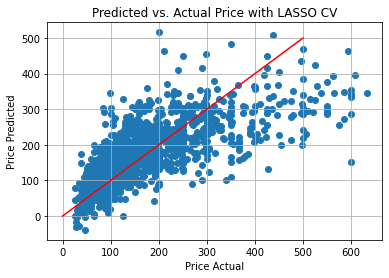

In [33]:
plt.scatter(y_test, y_pred)
plt.plot([0,500],[0,500],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with LASSO CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual')

# RidgeCV Model

In [34]:
from sklearn.linear_model import RidgeCV

reg_params = 10.**np.linspace(-10, 5, 10)
ridge_model = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
ridge_model.fit(X_train, y_train)

C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.55554e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83603e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.18095e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.52823e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (r

RidgeCV(alphas=array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00, 4.64158883e+01,
       2.15443469e+03, 1.00000000e+05]),
        cv=5)

In [35]:
# R2 of Training set
ridge_model.score(X_train,y_train)

# Predict model on test data
y_pred = ridge_model.predict(X_test)

#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
print('MAE: %.3f' % mae(y_test, y_pred))

rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

MAE: 54.560
RMSE test: 77.326
R^2 test: 0.534


Text(0.5, 0, 'Price Actual')

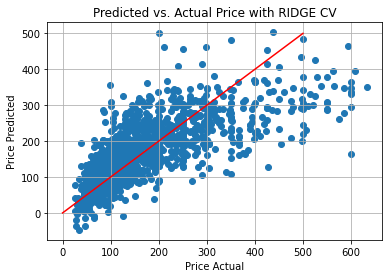

In [36]:
plt.scatter(y_test, y_pred)
plt.plot([0,500],[0,500],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Price with RIDGE CV')
plt.ylabel('Price Predicted')
plt.xlabel('Price Actual')

# SVR

In [37]:
from sklearn.svm import SVR
SVRmodel = SVR(kernel = 'linear')
SVRmodel.fit(X_train, y_train)

y_pred = SVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 80.882
R^2 test: 0.490


In [38]:
from sklearn.svm import LinearSVR
LinearSVRmodel = LinearSVR()
LinearSVRmodel.fit(X_train, y_train)

y_pred = LinearSVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 86.655
R^2 test: 0.415


C:\Users\User\Anaconda3\envs\py38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [39]:
from sklearn.svm import NuSVR
NuSVRmodel = NuSVR(kernel = 'linear')
NuSVRmodel.fit(X_train, y_train)

y_pred = NuSVRmodel.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

RMSE test: 79.646
R^2 test: 0.505
